In [ ]:
# !pip install q tensorflow==1.8
# !pip install q keras==2.2.0
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%tensorflow_version 1.x
import tensorflow as tf
%matplotlib inline
from google.colab import drive, output
from PIL import Image, ImageOps
import os
import keras
print('keras: %s' % keras.__version__)
print('tensorflow: %s' % tf.__version__)
import warnings
warnings.filterwarnings('ignore')

keras: 2.2.5
tensorflow: 1.15.0


Using TensorFlow backend.


In [ ]:
drive.mount('/content/gdrive')
drive_data_path = 'gdrive/My Drive/STARE/'

In [ ]:
!mkdir all_images_folder
!mkdir all_jpg_images_folder
!unzip 'gdrive/My Drive/STARE/all-images.zip' -d all_images_folder
output.clear()

In [ ]:
#used framework
#! git clone https://github.com/kbardool/keras-frcnn.git

Cloning into 'keras-frcnn'...
remote: Enumerating objects: 589, done.
remote: Total 589 (delta 0), reused 0 (delta 0), pack-reused 589
Receiving objects: 100% (589/589), 173.38 KiB | 755.00 KiB/s, done.
Resolving deltas: 100% (402/402), done.


In [ ]:
locations = pd.read_csv(drive_data_path+'Locations.txt', names=['image_name', 'colomn', 'row'], delimiter=' ', index_col=None)
print(locations.shape[0], 'examples')
locations[locations['row']>0].describe()

397 examples


,colomn,row
count,333.000000,333.000000
mean,282.471471,345.714715
std,52.420651,217.467017
min,41.000000,23.000000
25%,260.000000,119.000000
50%,282.000000,342.000000
75%,304.000000,570.000000
max,570.000000,663.000000


In [ ]:
new_locations = pd.DataFrame()
new_locations['image_path'] = 'all_jpg_images_folder/' + locations['image_name']
new_locations['row1']  = 0
new_locations['colomn1']  = 0
new_locations['row2']  = 0
new_locations['colomn2'] = 0
new_locations['class'] = 'disc'
for idx in range(locations.shape[0]):
  temp=locations['row'][idx]
  if temp == -1:
    continue
  if temp<90:
    new_locations['row1'][idx] = 20
    new_locations['row2'][idx] = temp+60
  elif temp>615:
    new_locations['row1'][idx] = temp-60
    new_locations['row2'][idx] = 685
  else:
    new_locations['row1'][idx] = temp-70
    new_locations['row2'][idx] = temp+70

  temp = locations['colomn'][idx]
  if temp<90:
    new_locations['colomn1'][idx] = 20
    new_locations['colomn2'][idx] = temp+60
  elif temp>655:
    new_locations['colomn1'][idx] = temp-60
    new_locations['colomn2'][idx] = 685
  else:
    new_locations['colomn1'][idx] = temp-70
    new_locations['colomn2'][idx] = temp+70
new_locations.head()

,image_path,row1,colomn1,row2,colomn2,class
0,all_jpg_images_folder/im0001.jpg,20,196,125,336,disc
1,all_jpg_images_folder/im0002.jpg,21,203,161,343,disc
2,all_jpg_images_folder/im0003.jpg,20,192,116,332,disc
3,all_jpg_images_folder/im0004.jpg,535,153,675,293,disc
4,all_jpg_images_folder/im0005.jpg,385,244,525,384,disc


In [ ]:
train, test = train_test_split(new_locations, train_size=93)
train.to_csv('Train_locations.txt', header=None, index=None, sep=',')
test.to_csv('Test_locations.txt', header=None, index=None, sep=',')

In [ ]:
all_image_paths = []
for i in range(1, 403):
  if os.path.isfile(str('all_images_folder/'+'im'+"{:04d}".format(i)+'.ppm')):
    Image.open(str('all_images_folder/'+'im'+"{:04d}".format(i)+'.ppm')).save(str('all_jpg_images_folder/'+'im'+"{:04d}".format(i)+'.jpg'))
    all_image_paths.append(str('all_jpg_images_folder/'+'im'+"{:04d}".format(i)+'.jpg'))


In [ ]:
def show_image(path, channel='rgb', point_coords=(-1, -1), rect_coords=(-1,-1,-1,-1)):
  pil_im = Image.open(path)
  if channel == 'gray':
    pil_im = ImageOps.grayscale(pil_im)
  pil_im = np.asarray(pil_im)
  if channel=='rgb':
    plt.imshow(pil_im)
  elif channel=='r':
    plt.imshow(pil_im[:,:,0], cmap='gray')
  elif channel=='g':
    plt.imshow(pil_im[:,:,1], cmap='gray')
  elif channel=='b':
    plt.imshow(pil_im[:,:,2], cmap='gray')
  elif channel=='gray':
    plt.imshow(pil_im, cmap='gray')
  if point_coords[0]>0 and point_coords[1]>0:
    plt.scatter(point_coords[0], point_coords[1], s=70, c='white', marker='x')
  if rect_coords[0]>0 and rect_coords[1]>0 and rect_coords[2]>0 and rect_coords[3]>0:
    plt.gca().add_patch(mpatches.Rectangle((rect_coords[0],rect_coords[1]),\
                                           rect_coords[2]-rect_coords[0],\
                                           rect_coords[3]-rect_coords[1],\
                                           linewidth=1,edgecolor='white',facecolor='none'))
  plt.show()

68 315


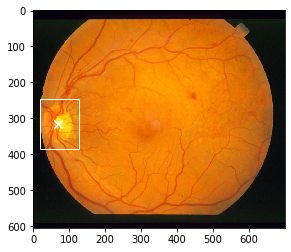

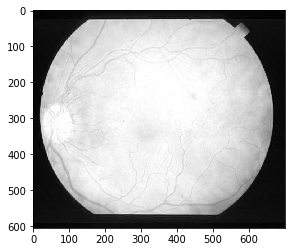

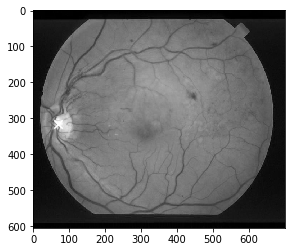

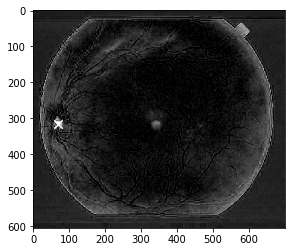

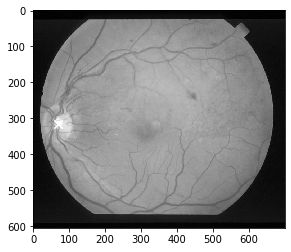

In [ ]:
im_num = 203
print(locations['row'][im_num], locations['colomn'][im_num])
show_image(all_image_paths[im_num], 'rgb', (locations['row'][im_num], locations['colomn'][im_num]), \
           (new_locations['row1'][im_num], new_locations['colomn1'][im_num],\
            new_locations['row2'][im_num], new_locations['colomn2'][im_num]))
show_image(all_image_paths[im_num], 'r', (locations['row'][im_num], locations['colomn'][im_num]))
show_image(all_image_paths[im_num], 'g', (locations['row'][im_num], locations['colomn'][im_num]))
show_image(all_image_paths[im_num], 'b', (locations['row'][im_num], locations['colomn'][im_num]))
show_image(all_image_paths[im_num], 'gray', (locations['row'][im_num], locations['colomn'][im_num]))

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
! python "gdrive/My Drive/STARE/keras-frcnn/train_frcnn.py" --network MyCNN -o simple --num_epochs 100 -p Train_locations.txt --hf --hf

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarn